# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix
import statsmodels.api as sm
%matplotlib inline 

In [2]:
%run "plots.py"

In [3]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('startup_data.csv')
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 923 rows and 49 columns.


In [5]:
duplicated_rows = df[df.duplicated()]
print(f'Number of duplicate rows: {len(duplicated_rows)}')

Number of duplicate rows: 0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

Missing values:

In [7]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

### status
'acquired' = startup succeeded 

'closed' = startup failed 

In [8]:
df['status'].unique()

array(['acquired', 'closed'], dtype=object)

In [9]:
if (df['status'].dtype == object):
    df['status'] = df.status.map({'acquired': 'Startup succeeded', 'closed': 'Startup failed'})

In [10]:
df['status'].value_counts()

Startup succeeded    597
Startup failed       326
Name: status, dtype: int64

### Categorical columns

In [11]:
print('is_software:', df['is_software'].unique())

print('is_web:', df['is_web'].unique())

print('is_enterprise:', df['is_enterprise'].unique())

print('is_advertising:', df['is_advertising'].unique())

print('is_gamesvideo:', df['is_gamesvideo'].unique())

print('is_mobile:', df['is_mobile'].unique())

print('is_ecommerce:', df['is_ecommerce'].unique()) 

print('is_biotech:', df['is_biotech'].unique())

print('is_consulting:', df['is_consulting'].unique())

print('is_othercategory:', df['is_othercategory'].unique())

print('has_roundA:', df['has_roundA'].unique())

print('has_roundB:', df['has_roundB'].unique())

print('has_roundC:', df['has_roundC'].unique())

print('has_roundD:', df['has_roundD'].unique())

print('has_VC:', df['has_VC'].unique())

print('has_angel:', df['has_angel'].unique())

is_software: [0 1]
is_web: [0 1]
is_enterprise: [0 1]
is_advertising: [0 1]
is_gamesvideo: [0 1]
is_mobile: [0 1]
is_ecommerce: [0 1]
is_biotech: [0 1]
is_consulting: [0 1]
is_othercategory: [1 0]
has_roundA: [0 1]
has_roundB: [0 1]
has_roundC: [0 1]
has_roundD: [0 1]
has_VC: [0 1]
has_angel: [1 0]


### state_code

In [12]:
df['state_code'].unique()

array(['CA', 'MA', 'KY', 'NY', 'CO', 'VA', 'TX', 'WA', 'IL', 'NC', 'PA',
       'GA', 'NH', 'MO', 'FL', 'NJ', 'WV', 'MI', 'DC', 'CT', 'MD', 'OH',
       'TN', 'MN', 'RI', 'OR', 'UT', 'ME', 'NV', 'NM', 'IN', 'AZ', 'ID',
       'AR', 'WI'], dtype=object)

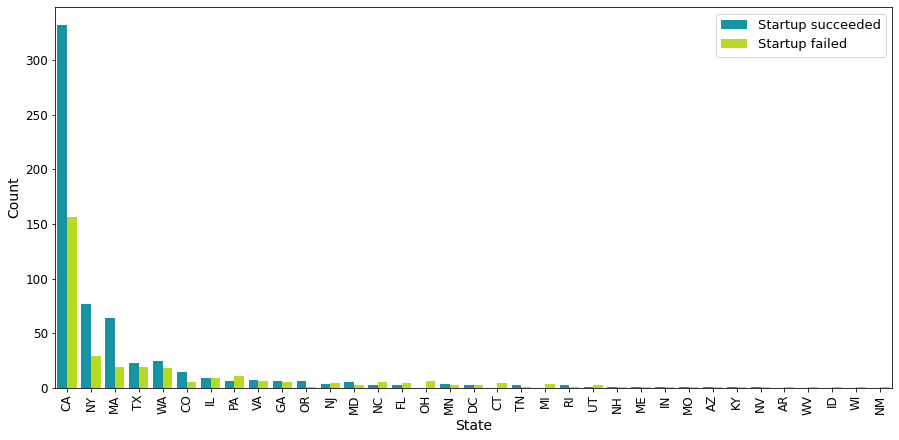

In [13]:
plot_countplot(df=df, x='state_code', hue='status', x_label='State', y_label='Count',   
                 figsize=(15, 7), sort_by_count=True)

### state_code.1

state_code.1 is useless column.

In [14]:
df.loc[df['state_code'] != df['state_code.1'], ['state_code', 'state_code.1']]

,state_code,state_code.1
515,CA,NaN


### city

In [15]:
df['city'].unique()

array(['San Diego', 'Los Gatos', 'Cupertino', 'San Francisco',
       'Mountain View', 'San Rafael', 'Williamstown', 'Palo Alto',
       'Menlo Park', 'Louisville', 'Brooklyn', 'Denver', 'Vienna',
       'Los Altos', 'Burlingame', 'New York', 'Austin', 'Seattle',
       'Boulder', 'Chicago', 'Berkeley', 'Santa Ana', 'Moffett Field',
       'Durham', 'Pittsburgh', 'San Jose', 'Atlanta', 'Manchester',
       'Sunnyvale', 'Cambridge', 'San Mateo', 'South San Francisco',
       'Boston', 'Waltham', 'Aliso Viejo', 'Kansas City', 'Wilmington',
       'Kirkland', 'Tampa', 'Alameda', 'Bothell', 'Dallas', 'Fremont',
       'Santa Clara', 'Princeton', 'Loveland', 'Kearneysville',
       'Los Angeles', 'Canton', 'Bellevue', 'Washington', 'Somerset',
       'Alpharetta', 'Charlottesville', 'Dulles', 'Bloomfield',
       'Santa Monica', 'Milpitas', 'Raleigh', 'Somerville',
       'Redwood City', 'Timonium', 'Reston', 'Cincinnati', 'Campbell',
       'Sterling', 'Foster City', 'Oakland', 'Petaluma',

In [16]:
df['city'].value_counts().head(15)

San Francisco    128
New York          91
Mountain View     47
Palo Alto         35
Austin            27
Santa Clara       27
San Mateo         26
Seattle           26
Sunnyvale         22
San Jose          18
Cambridge         16
Menlo Park        16
San Diego         15
Los Angeles       15
Redwood City      14
Name: city, dtype: int64

### category_code

In [17]:
df['category_code'].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

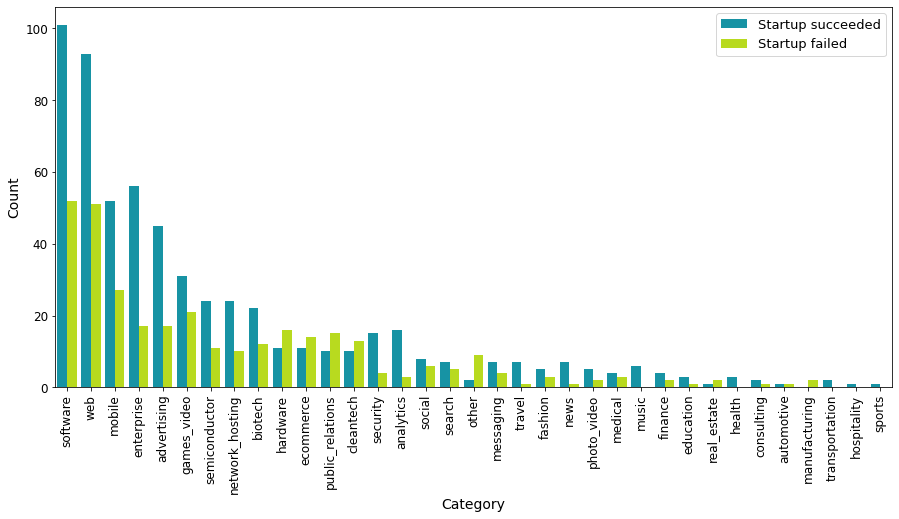

In [18]:
plot_countplot(df=df, x='category_code', hue='status', x_label='Category', y_label='Count',  
                 figsize=(15, 7), sort_by_count=True)

### is_top500

In [19]:
df['is_top500'].unique()

array([0, 1], dtype=int64)

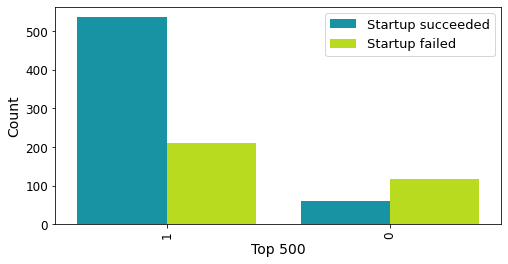

In [20]:
plot_countplot(df=df, x='is_top500', hue='status', x_label='Top 500', y_label='Count',  
                 figsize=(8, 4), sort_by_count=True)

### funding_rounds

In [21]:
df['funding_rounds'].unique()

array([ 3,  4,  1,  2,  5,  7,  6, 10,  8], dtype=int64)

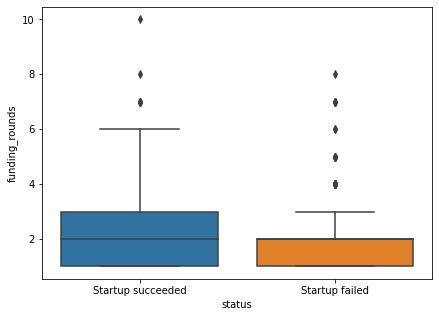

In [22]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(x='status', y='funding_rounds', data=df)

### relationships

In [23]:
df['relationships'].unique()

array([ 3,  9,  5,  2,  6, 25, 13, 14, 22,  8,  0, 15, 12,  7, 10,  1,  4,
       37, 18, 26, 11, 17, 24, 16, 21, 27, 30, 33, 32, 23, 57, 20, 35, 19,
       45, 31, 29, 63, 42, 28, 38], dtype=int64)

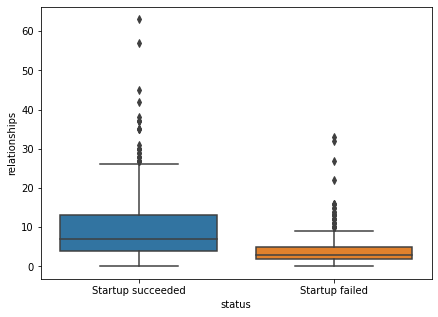

In [24]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(x='status', y='relationships', data=df)

### milestones

In [25]:
df['milestones'].unique()

array([3, 1, 2, 4, 0, 5, 6, 8], dtype=int64)

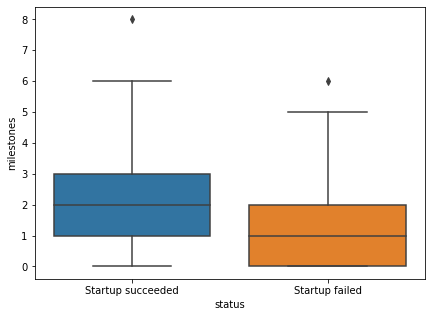

In [26]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(x='status', y='milestones', data=df)

### avg_participants

In [27]:
df['avg_participants'].unique()

array([ 1.    ,  4.75  ,  4.    ,  3.3333,  3.    ,  1.6667,  3.5   ,
        1.75  ,  2.3333,  2.5   ,  5.    ,  1.5   ,  2.    ,  4.5   ,
        2.75  ,  9.5   ,  2.6667,  2.25  ,  6.    ,  3.6667,  9.    ,
        7.    ,  6.3333,  4.6667,  5.3333,  5.2   , 10.    ,  6.5   ,
        1.3333,  3.1667,  5.5   ,  8.    ,  2.4   ,  5.8   ,  3.8   ,
        4.3333,  4.25  , 12.5   ,  8.5   ,  2.8   ,  3.25  ,  5.6667,
        9.3333,  5.75  ,  7.6667,  3.4   ,  3.2   ,  4.2   , 11.    ,
        6.75  ,  2.7143, 16.    , 11.5   ,  8.6667,  1.25  ,  1.4   ,
        3.75  ,  7.5   ,  5.6   ])

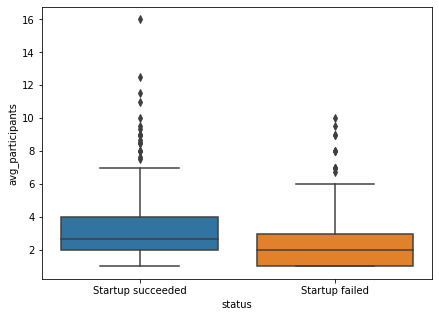

In [28]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(x='status', y='avg_participants', data=df)

### age_first_funding_year

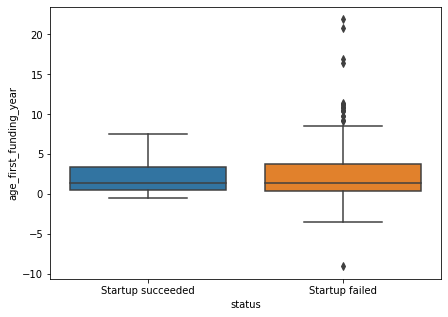

In [29]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(x='status', y='age_first_funding_year', data=df)

### age_last_funding_year

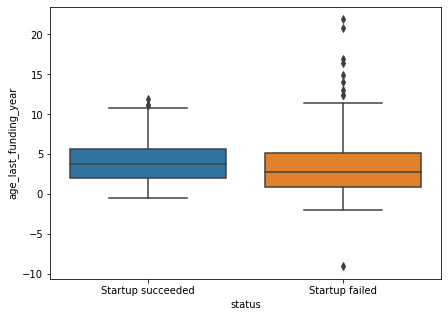

In [30]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(x='status', y='age_last_funding_year', data=df)

### funding_total_usd

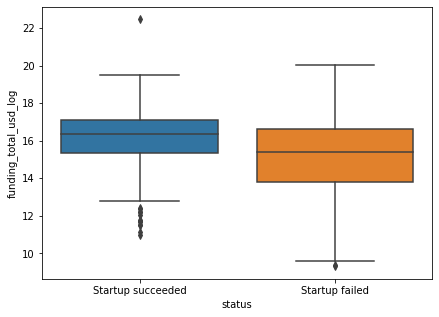

In [31]:
# log transformation
df['funding_total_usd_log'] = np.log(df['funding_total_usd'])

fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(x='status', y='funding_total_usd_log', data=df)

### Correlation matrix

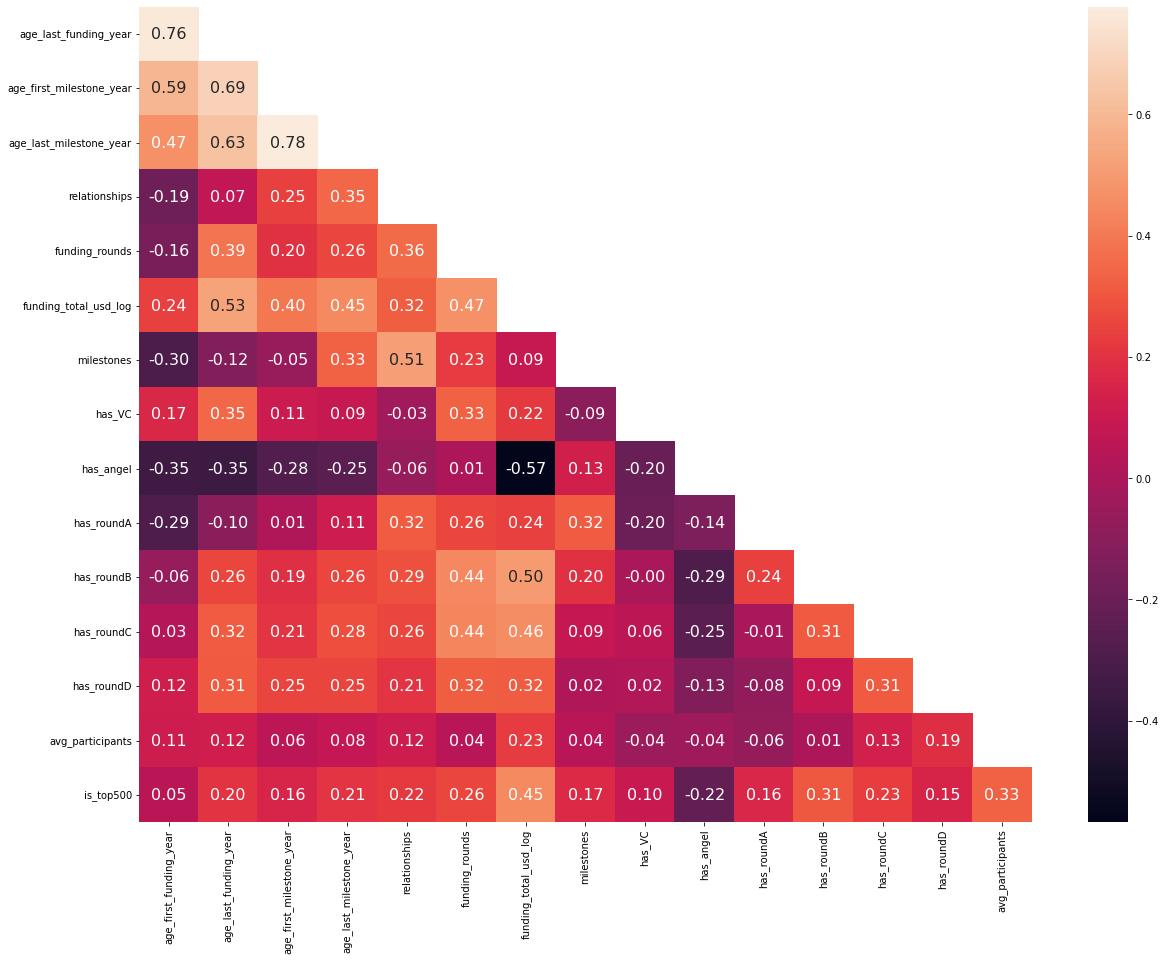

In [32]:
cols = ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 
            'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd_log', 
            'milestones', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB','has_roundC',
            'has_roundD', 'avg_participants', 'is_top500', 'status']

df_corr = df[cols].corr()
plot_corr_matrix(df_corr, fontsize=16, figsize=(20, 15))

### Pair plots

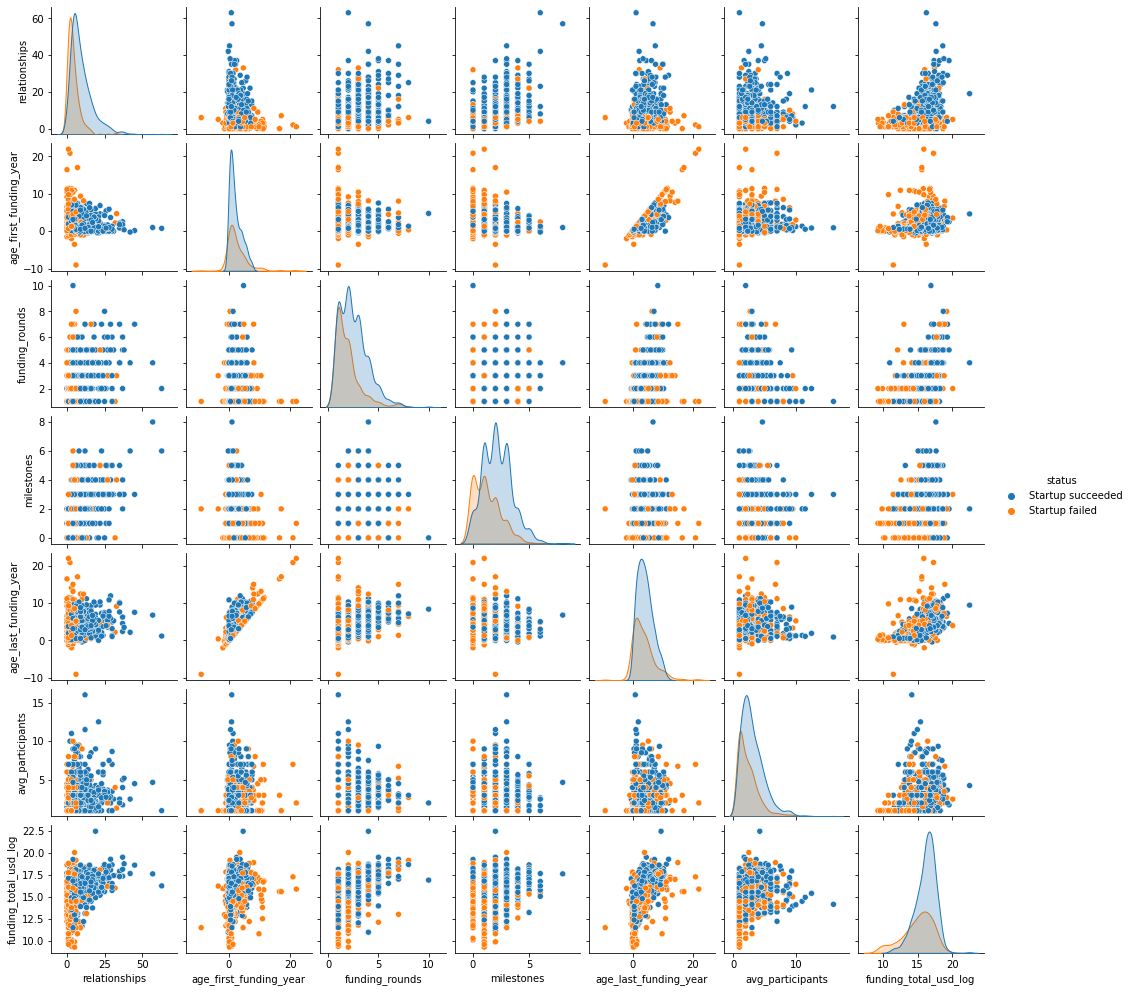

In [33]:
sns.pairplot(df, hue='status', height=2, vars=['relationships', 'age_first_funding_year', 'funding_rounds',
                                     'milestones', 'age_last_funding_year', 'avg_participants', 
                                     'funding_total_usd_log'])   
plt.show()